In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
import joblib

In [2]:
data=pd.read_csv("calories.csv")

In [3]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
print("Total records in dataset:",data.shape[0])
print("Total features in dataset:",data.shape[1])

Total records in dataset: 15000
Total features in dataset: 9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [7]:
unique_values={col:data[col].unique() for col in data.columns}
unique_values

{'User_ID': array([14733363, 14861698, 11179863, ..., 17271188, 18643037, 11751526],
       dtype=int64),
 'Gender': array(['male', 'female'], dtype=object),
 'Age': array([68, 20, 69, 34, 27, 36, 33, 41, 60, 26, 21, 66, 32, 53, 39, 46, 50,
        67, 31, 48, 29, 42, 62, 38, 25, 24, 22, 74, 70, 44, 61, 63, 54, 47,
        35, 28, 77, 64, 45, 57, 49, 40, 55, 23, 43, 52, 79, 51, 59, 30, 37,
        56, 58, 78, 73, 76, 72, 65, 71, 75], dtype=int64),
 'Height': array([190., 166., 179., 154., 151., 158., 175., 186., 146., 177., 157.,
        171., 182., 156., 169., 188., 189., 148., 165., 176., 173., 159.,
        183., 160., 184., 155., 195., 152., 193., 168., 174., 191., 164.,
        198., 170., 167., 185., 163., 192., 178., 197., 187., 144., 202.,
        201., 181., 136., 180., 194., 143., 149., 172., 153., 147., 199.,
        161., 204., 203., 145., 200., 150., 162., 205., 208., 209., 206.,
        140., 132., 196., 207., 212., 135., 133., 139., 138., 217., 211.,
        142., 137., 

In [8]:
data.drop(["User_ID"],axis=1,inplace=True)

In [9]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [36]:
data.describe()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


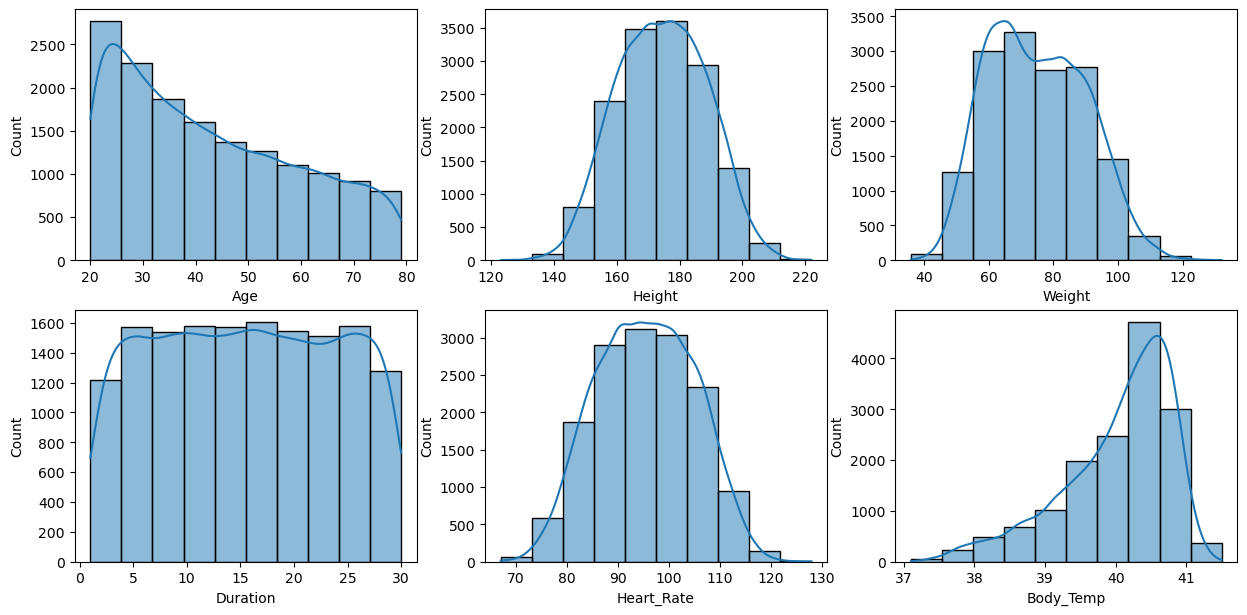

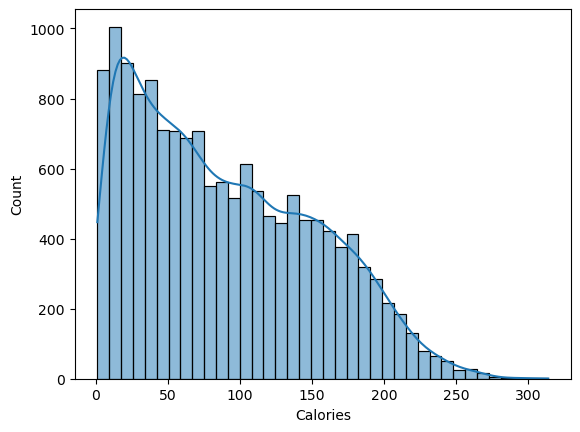

In [10]:
plt.figure(figsize=(15,15))
plt.subplot(4,3,1)
sns.histplot(data["Age"],kde=True,bins=10)
plt.subplot(4,3,2)
sns.histplot(data["Height"],kde=True,bins=10)
plt.subplot(4,3,3)
sns.histplot(data["Weight"],kde=True,bins=10)
plt.subplot(4,3,4)
sns.histplot(data["Duration"],kde=True,bins=10)
plt.subplot(4,3,5)
sns.histplot(data["Heart_Rate"],kde=True,bins=10)
plt.subplot(4,3,6)
sns.histplot(data["Body_Temp"],kde=True,bins=10)
plt.show()
sns.histplot(data["Calories"],kde=True)
plt.show()


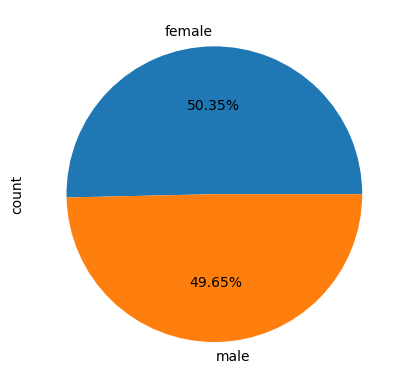

In [11]:
data["Gender"].value_counts().plot(kind="pie",autopct="%0.2f%%")
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder 
gender_encode=LabelEncoder()

In [13]:
data["Gender"]=gender_encode.fit_transform(data["Gender"])

In [14]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


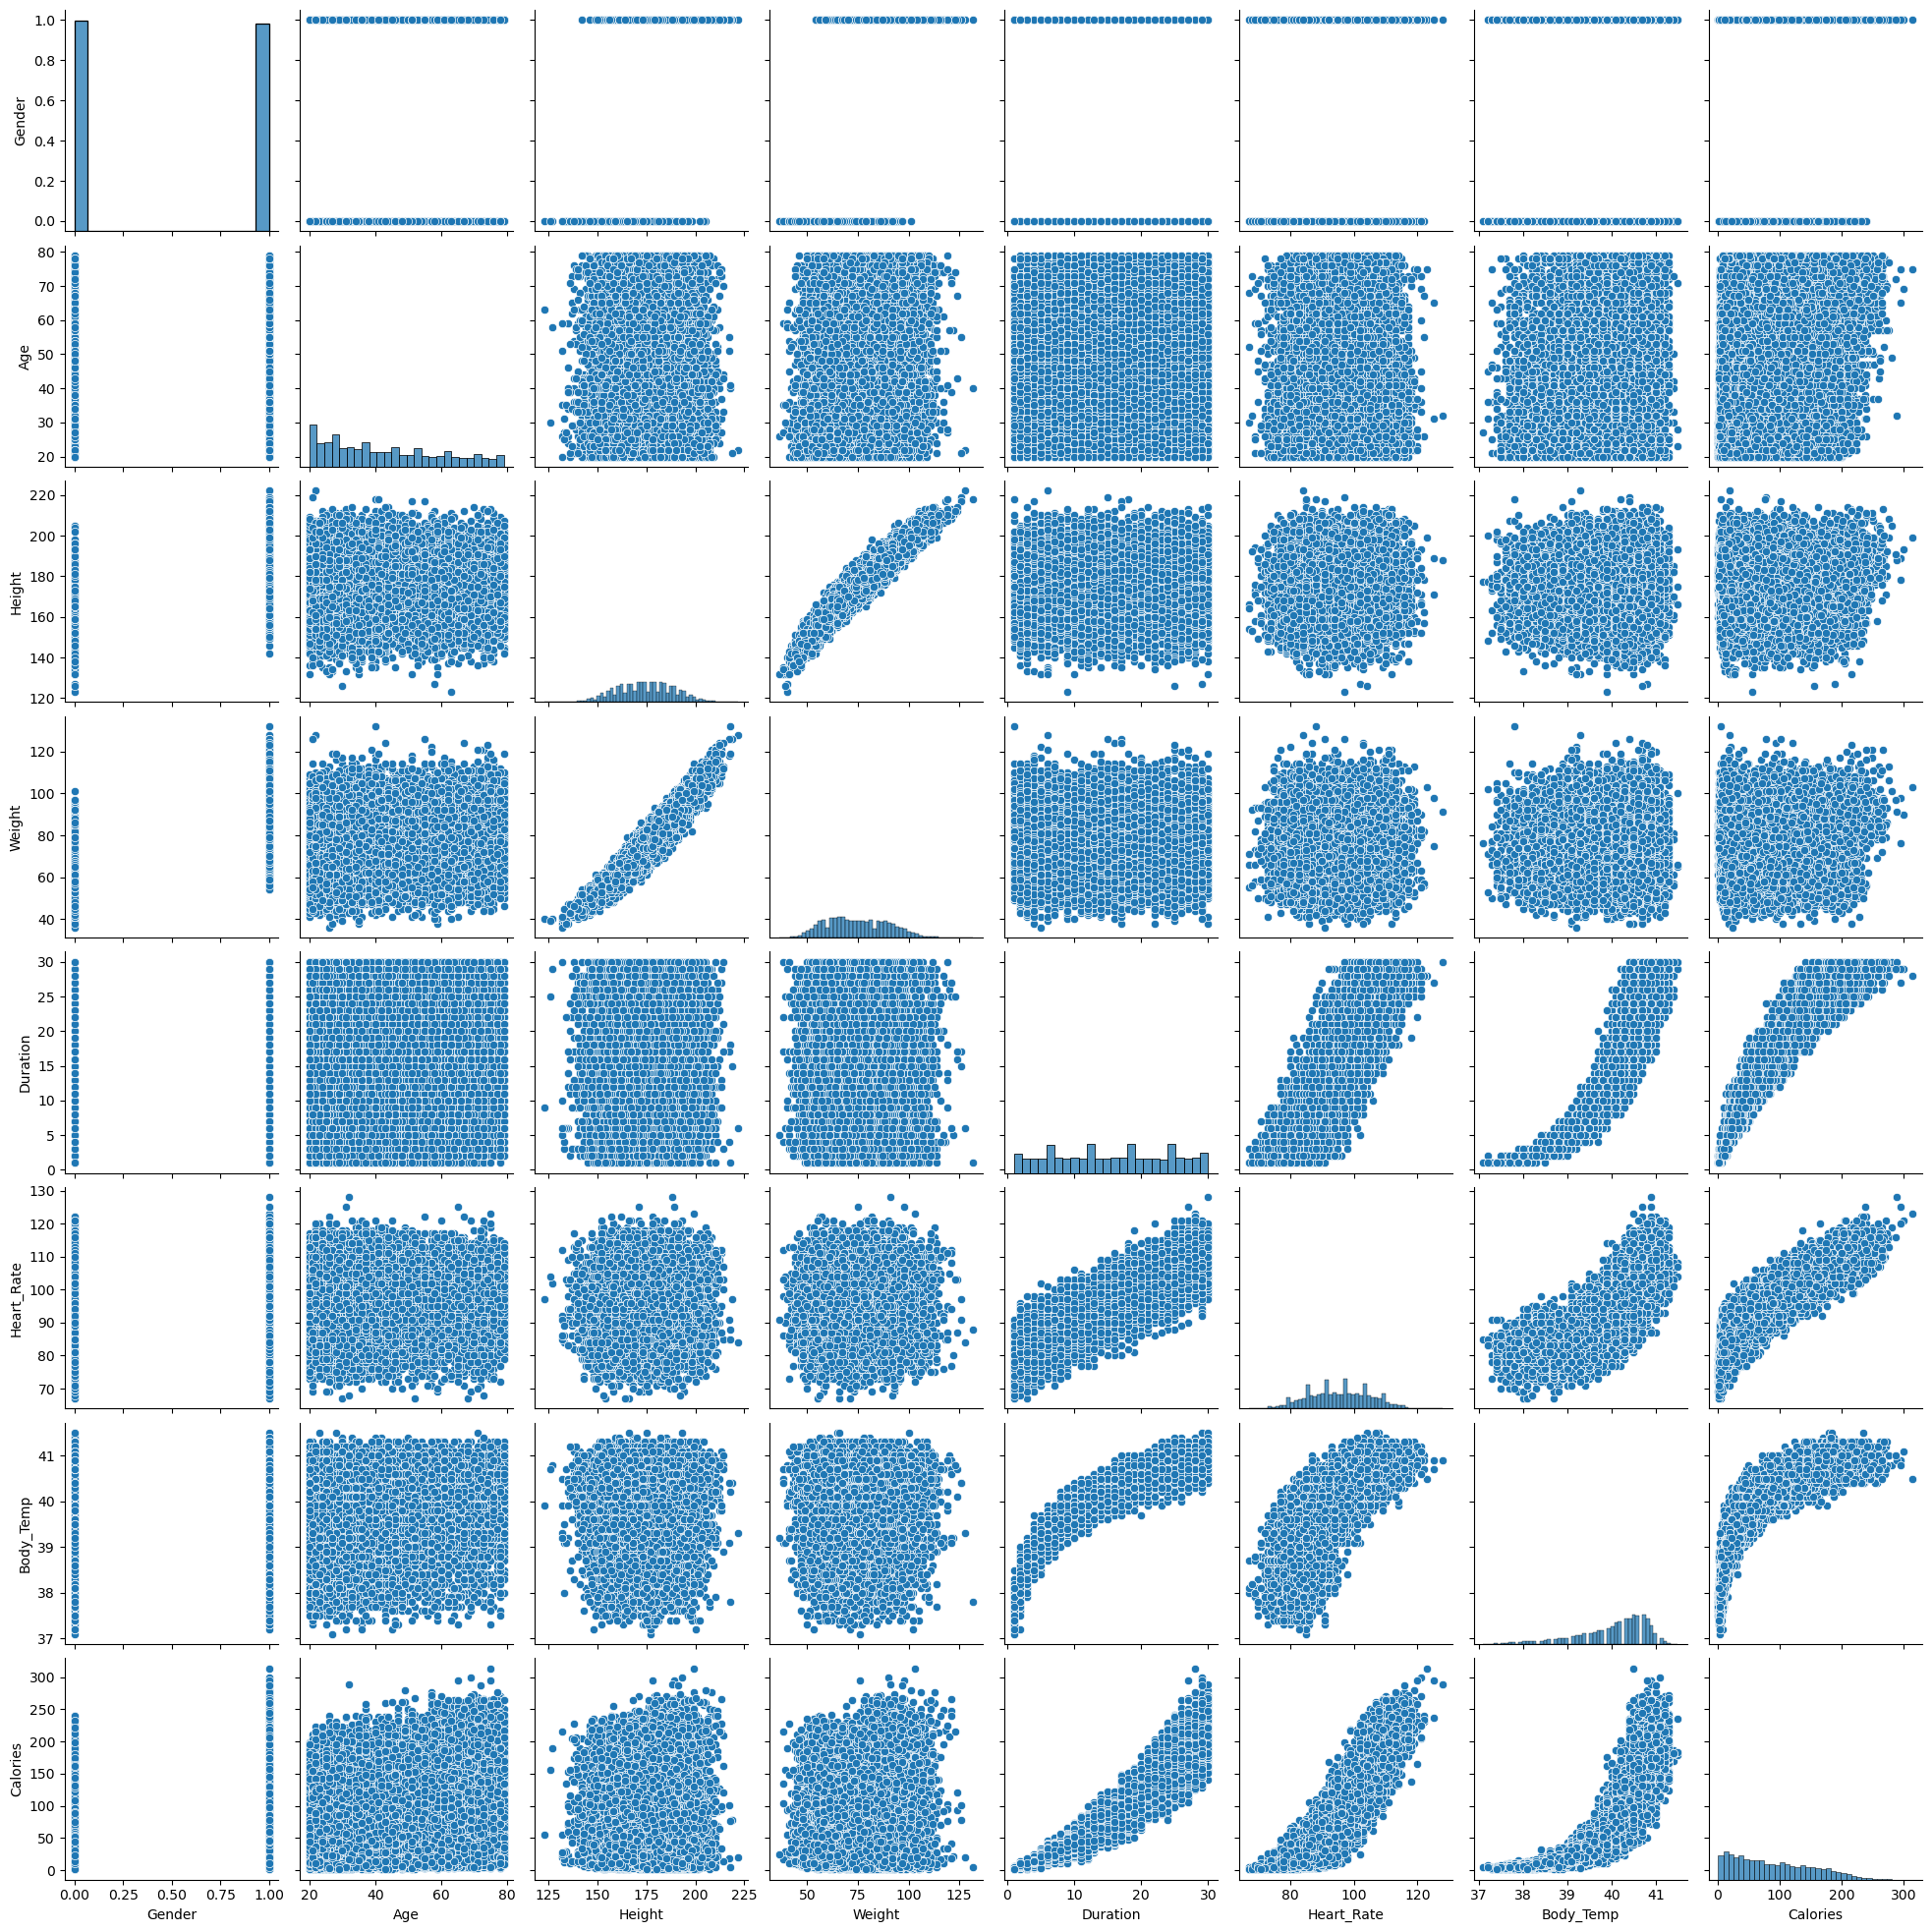

In [15]:
sns.pairplot(data)
plt.show()

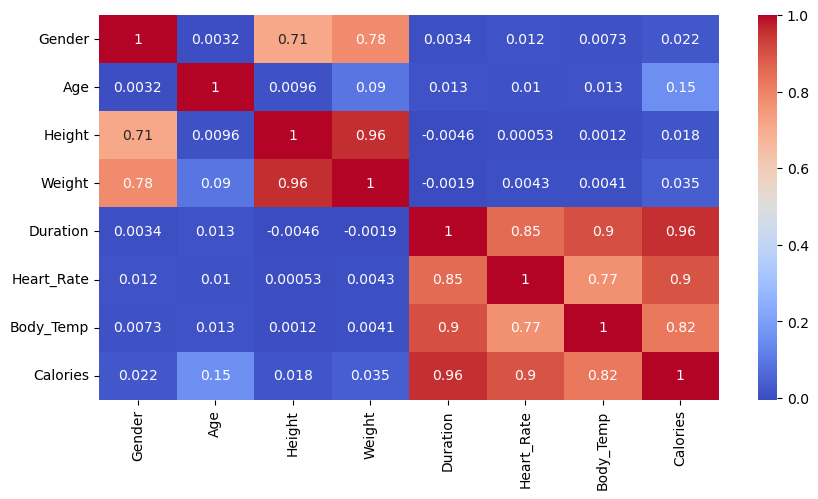

In [16]:
corr=data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [17]:
x=data.drop(["Calories"],axis=1)
y=data["Calories"]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
print("train x shape:",train_x.shape,"train y shape:",train_y.shape)
print("test x shape:",test_x.shape,"test y shape:",test_y.shape)

train x shape: (12000, 7) train y shape: (12000,)
test x shape: (3000, 7) test y shape: (3000,)


In [21]:
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()

scale_train_x=scale.fit_transform(train_x)
scale_test_x=scale.transform(test_x)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.neighbors import KNeighborsRegressor 

In [23]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error

In [24]:
def adjusted_r2_score(data,actual,predicted):
    r2=r2_score(actual,predicted)
    n=data.shape[0]
    k=data.shape[1]

    adj_r2=1-(1-r2)*(n-1)/(n-k-1)
    return adj_r2
    

In [25]:
def get_metrics(actual,predicted,data): 
    r2=r2_score(actual,predicted)
    adj_r2=adjusted_r2_score(data,actual,predicted)
    mse=mean_squared_error(actual,predicted)
    mae=mean_absolute_error(actual,predicted) 
    rmse=root_mean_squared_error(actual,predicted)
    return r2,adj_r2,mse,mae,rmse
    

In [26]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(alpha=0.5), 
    "Lasso":Lasso(alpha=0.5), 
    "DecisionTreeRegressor":DecisionTreeRegressor(max_depth=10), 
    "RandomForestRegressor":RandomForestRegressor(), 
    "GradientBoostingRegressor":GradientBoostingRegressor(), 
    "AdaBoostRegressor":AdaBoostRegressor(), 
    "KNeighborsRegressor":KNeighborsRegressor()
    #"PolynomialFeatures":PolynomialFeatures(degree=2)
}

In [27]:
for i in range(len(list(models))): 
    model=list(models.values())[i]
    model.fit(scale_train_x,train_y)

    train_pred=model.predict(scale_train_x)
    test_pred=model.predict(scale_test_x)

    train_r2,train_adj_r2,train_mse,train_mae,train_rmse=get_metrics(train_y,train_pred,scale_train_x)
    test_r2,test_adj_r2,test_mse,test_mae,test_rmse=get_metrics(test_y,test_pred,scale_test_x)

    print(list(models.keys())[i])
    print("*"*30)
    print("Training data:")
    print("-"*50)
    print("R2 SCORE:",train_r2)
    print("ADJUSTED R2 SCORE:",train_adj_r2)
    print("MEAN SQUARED ERROR:",train_mse)
    print("MEAN ABSOLUTE ERROR:",train_mae)
    print("ROOT MEAN SQUARED ERROR:",train_rmse)
    print("-"*50)
    print("Testing data:")
    print("-"*50)
    print("R2 SCORE:",test_r2)
    print("ADJUSTED R2 SCORE:",test_adj_r2)
    print("MEAN SQUARED ERROR:",test_mse)
    print("MEAN ABSOLUTE ERROR:",test_mae)
    print("ROOT MEAN SQUARED ERROR:",test_rmse)
    print("="*80)
    print("\n")
    

    

LinearRegression
******************************
Training data:
--------------------------------------------------
R2 SCORE: 0.9671621074066676
ADJUSTED R2 SCORE: 0.9671429391905108
MEAN SQUARED ERROR: 126.94582456688235
MEAN ABSOLUTE ERROR: 8.306790197742504
ROOT MEAN SQUARED ERROR: 11.267023767032816
--------------------------------------------------
Testing data:
--------------------------------------------------
R2 SCORE: 0.9672937151257295
ADJUSTED R2 SCORE: 0.9672171964111173
MEAN SQUARED ERROR: 131.99574575081695
MEAN ABSOLUTE ERROR: 8.441513553849704
ROOT MEAN SQUARED ERROR: 11.488940149152878


Ridge
******************************
Training data:
--------------------------------------------------
R2 SCORE: 0.9671620948915192
ADJUSTED R2 SCORE: 0.9671429266680569
MEAN SQUARED ERROR: 126.94587294836234
MEAN ABSOLUTE ERROR: 8.306663078962995
ROOT MEAN SQUARED ERROR: 11.267025914071661
--------------------------------------------------
Testing data:
---------------------------------

# Hyperparameter tuning

In [28]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV

In [29]:
cv=KFold()

In [30]:
rf=RandomForestRegressor() 


n_estimators=[int(x) for x in np.linspace(start=10,stop=100,num=5)]
max_depth=[int(x) for x in np.linspace(start=3,stop=30,num=2)]
min_samples_split=[2,3]
min_samples_leaf=[1,2,3]
max_features=[0.7,0.8,0.5,1.0]

params_rf=dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features)

rf_tun=GridSearchCV(estimator=rf,param_grid=params_rf,cv=cv,n_jobs=-1,verbose=3)

rf_tun.fit(scale_train_x,train_y)

train_pred=rf_tun.predict(scale_train_x)
test_pred=rf_tun.predict(scale_test_x)

train_r2,train_adj_r2,train_mse,train_mae,train_rmse=get_metrics(train_y,train_pred,scale_train_x)
test_r2,test_adj_r2,test_mse,test_mae,test_rmse=get_metrics(test_y,test_pred,scale_test_x)


print("*"*30)
print("Training data:")
print("-"*50)
print("R2 SCORE:",train_r2)
print("ADJUSTED R2 SCORE:",train_adj_r2)
print("MEAN SQUARED ERROR:",train_mse)
print("MEAN ABSOLUTE ERROR:",train_mae)
print("ROOT MEAN SQUARED ERROR:",train_rmse)
print("-"*50)
print("Testing data:")
print("-"*50)
print("R2 SCORE:",test_r2)
print("ADJUSTED R2 SCORE:",test_adj_r2)
print("MEAN SQUARED ERROR:",test_mse)
print("MEAN ABSOLUTE ERROR:",test_mae)
print("ROOT MEAN SQUARED ERROR:",test_rmse)
print("="*80)
print("\n")
print(rf_tun.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
******************************
Training data:
--------------------------------------------------
R2 SCORE: 0.9996575659551998
ADJUSTED R2 SCORE: 0.9996573660687494
MEAN SQUARED ERROR: 1.3237929947353562
MEAN ABSOLUTE ERROR: 0.703927072751323
ROOT MEAN SQUARED ERROR: 1.1505620342838347
--------------------------------------------------
Testing data:
--------------------------------------------------
R2 SCORE: 0.9983279878226448
ADJUSTED R2 SCORE: 0.9983240760294491
MEAN SQUARED ERROR: 6.747892495367802
MEAN ABSOLUTE ERROR: 1.645928401154401
ROOT MEAN SQUARED ERROR: 2.59767059023422


{'max_depth': 30, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


In [31]:
final_model=RandomForestRegressor(max_depth=30,max_features=0.8,min_samples_leaf=1,min_samples_split=2,n_estimators=100)

final_model.fit(scale_train_x,train_y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
act_pred=pd.DataFrame({
    "actual":test_y, 
    "predicted":final_model.predict(scale_test_x)
}).reset_index(drop=True)

In [33]:
act_pred.head()

,actual,predicted
0,173.0,171.37
1,189.0,191.91
2,53.0,53.11
3,161.0,160.76
4,226.0,220.20


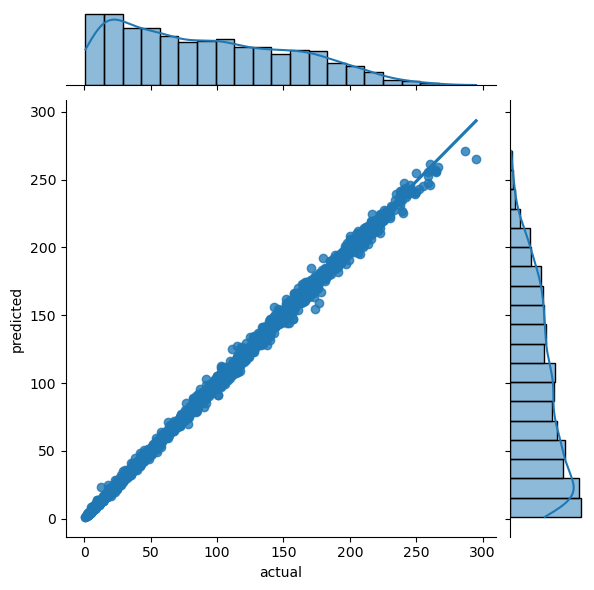

In [34]:
sns.jointplot(data=act_pred,x="actual",y="predicted",kind="reg")
plt.show()

In [35]:
joblib.dump(gender_encode,"gender_encode.joblib")
joblib.dump(scale,"scale.joblib")
joblib.dump(final_model,"model.joblib")

['model.joblib']